# Loan Prediction using Machine Learning

This ML task requires you to build a model that will classify how much loan the user can take. 
Columns that are available in train data are user’s marital status, education, number of dependents, and employments.
The train data has a loan status column with Y or N values stating whether user can take loan amount specified or not.

You can choose an algorithm to build this model. Kindly apply cross validation during training and state the features important in building the model.

Deliverables
- csv output of predicted classification of test data
- feature importance
- train and test scores (mean score and standard deviation)

**NB:** Kindly add comments to the cells describing what is done at each step

In [1]:
# importing basic packages
# Import the necessary pythonpackages that can help in building the model or plotting values
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
# reading input data
train_data = pd.read_csv("./data/train_data.csv")
test_data = pd.read_csv("./data/test_data.csv")

In [3]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
train_data.dropna(inplace = True)
train_data.reset_index(inplace=True, drop=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 48.9+ KB


In [7]:
test_data.dropna(inplace=True)
test_data.reset_index(inplace=True, drop=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            289 non-null    object 
 1   Gender             289 non-null    object 
 2   Married            289 non-null    object 
 3   Dependents         289 non-null    object 
 4   Education          289 non-null    object 
 5   Self_Employed      289 non-null    object 
 6   ApplicantIncome    289 non-null    int64  
 7   CoapplicantIncome  289 non-null    int64  
 8   LoanAmount         289 non-null    float64
 9   Loan_Amount_Term   289 non-null    float64
 10  Credit_History     289 non-null    float64
 11  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 27.2+ KB


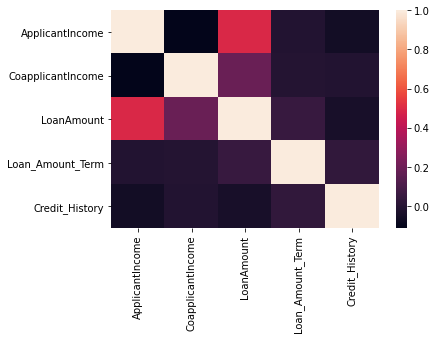

In [8]:
#checking for collinearity in features
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix)
#no collinearity in features, so we can go ahead and build model

In [9]:
train_features = train_data.drop(['Loan_ID', 'Loan_Status'], axis = 1)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 41.4+ KB


In [10]:
test_features = test_data.drop(['Loan_ID'], axis = 1)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             289 non-null    object 
 1   Married            289 non-null    object 
 2   Dependents         289 non-null    object 
 3   Education          289 non-null    object 
 4   Self_Employed      289 non-null    object 
 5   ApplicantIncome    289 non-null    int64  
 6   CoapplicantIncome  289 non-null    int64  
 7   LoanAmount         289 non-null    float64
 8   Loan_Amount_Term   289 non-null    float64
 9   Credit_History     289 non-null    float64
 10  Property_Area      289 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 25.0+ KB


In [11]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
train_features_dummies = pd.get_dummies(train_features[categorical_features], prefix=categorical_features)
train_features_dummies

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
3,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
4,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
476,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
477,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
478,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [12]:
train_features = pd.concat([train_features, train_features_dummies], axis=1)
train_features

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,1,0,0,1,0,1,0,1,0,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,0,0,0,1,0,0,1,0,0,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,0,0,0,0,1,1,0,0,0,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,0,0,0,1,0,1,0,0,0,1
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,...,0,0,0,1,0,1,0,1,0,0
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,...,0,0,1,1,0,1,0,1,0,0
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,...,1,0,0,1,0,1,0,0,0,1
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,...,0,1,0,1,0,1,0,0,0,1


In [13]:
train_features.drop(categorical_features, inplace=True, axis=1)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          480 non-null    int64  
 1   CoapplicantIncome        480 non-null    float64
 2   LoanAmount               480 non-null    float64
 3   Loan_Amount_Term         480 non-null    float64
 4   Credit_History           480 non-null    float64
 5   Gender_Female            480 non-null    uint8  
 6   Gender_Male              480 non-null    uint8  
 7   Married_No               480 non-null    uint8  
 8   Married_Yes              480 non-null    uint8  
 9   Dependents_0             480 non-null    uint8  
 10  Dependents_1             480 non-null    uint8  
 11  Dependents_2             480 non-null    uint8  
 12  Dependents_3+            480 non-null    uint8  
 13  Education_Graduate       480 non-null    uint8  
 14  Education_Not Graduate   4

In [14]:
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
test_features_dummies = pd.get_dummies(test_features[categorical_features], prefix=categorical_features)
test_features = pd.concat([test_features, test_features_dummies], axis=1)
test_features.drop(categorical_features, inplace=True, axis=1)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          289 non-null    int64  
 1   CoapplicantIncome        289 non-null    int64  
 2   LoanAmount               289 non-null    float64
 3   Loan_Amount_Term         289 non-null    float64
 4   Credit_History           289 non-null    float64
 5   Gender_Female            289 non-null    uint8  
 6   Gender_Male              289 non-null    uint8  
 7   Married_No               289 non-null    uint8  
 8   Married_Yes              289 non-null    uint8  
 9   Dependents_0             289 non-null    uint8  
 10  Dependents_1             289 non-null    uint8  
 11  Dependents_2             289 non-null    uint8  
 12  Dependents_3+            289 non-null    uint8  
 13  Education_Graduate       289 non-null    uint8  
 14  Education_Not Graduate   2

In [15]:
train_labels = train_data['Loan_Status']
train_labels

0      N
1      Y
2      Y
3      Y
4      Y
      ..
475    Y
476    Y
477    Y
478    Y
479    N
Name: Loan_Status, Length: 480, dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels = le.fit_transform(train_labels)
train_labels

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [137]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
import numpy as np

clf = GaussianNB()
kf = KFold(shuffle = True, random_state = 1) # using default split value of 5

scores = []
for train_index, val_index in kf.split(train_features):
    X_train, X_val =  train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_val, y_val))
print('Scores for each iteration:', scores)
print('Mean Score: ', np.mean(scores))
print('Standard Deviation: ', np.std(scores))

    




Scores for each iteration: [0.75, 0.84375, 0.8229166666666666, 0.78125, 0.7916666666666666]
Mean Score:  0.7979166666666666
Standard Deviation:  0.03267580654449609


In [139]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

log_reg = LogisticRegression(solver = 'liblinear', random_state = 2)
kf = KFold(shuffle = True, random_state = 1) # using default split value of 5

scores = []
for train_index, val_index in kf.split(train_features):
    X_train, X_val =  train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    log_reg.fit(X_train, y_train)
    scores.append(log_reg.score(X_val, y_val))
print('Scores for each iteration:', scores)
print('Mean Score: ', np.mean(scores))
print('Standard Deviation: ', np.std(scores))

    




Scores for each iteration: [0.7604166666666666, 0.8541666666666666, 0.8125, 0.8020833333333334, 0.8125]
Mean Score:  0.8083333333333332
Standard Deviation:  0.029901458530015256


In [128]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

tree_clf = DecisionTreeClassifier()
kf = KFold(shuffle = True, random_state = 1) # using default split value of 5

scores = []
for train_index, val_index in kf.split(train_features):
    X_train, X_val =  train_features.iloc[train_index], train_features.iloc[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]
    tree_clf.fit(X_train, y_train)
    scores.append(tree_clf.score(X_val, y_val))
print('Scores for each iteration:', scores)
print('Mean Score: ', np.mean(scores))
print('Standard Deviation: ', np.std(scores))

    

Scores for each iteration: [0.6458333333333334, 0.7395833333333334, 0.6979166666666666, 0.6666666666666666, 0.7395833333333334]
Mean Score:  0.6979166666666667
Standard Deviation:  0.037845629426218656


In [130]:
predict_test = clf.predict(test_features)
pd.DataFrame(predict_test).to_csv('Predicted_test_data_classes.csv')
predict_test

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

Feature: 0, Score: 0.00001
Feature: 1, Score: -0.00004
Feature: 2, Score: -0.00275
Feature: 3, Score: -0.00066
Feature: 4, Score: 3.03689
Feature: 5, Score: -0.24308
Feature: 6, Score: -0.12273
Feature: 7, Score: -0.46160
Feature: 8, Score: 0.09579
Feature: 9, Score: -0.20904
Feature: 10, Score: -0.49013
Feature: 11, Score: 0.26783
Feature: 12, Score: 0.06553
Feature: 13, Score: -0.06370
Feature: 14, Score: -0.30211
Feature: 15, Score: -0.10012
Feature: 16, Score: -0.26569
Feature: 17, Score: -0.43097
Feature: 18, Score: 0.36294
Feature: 19, Score: -0.29778


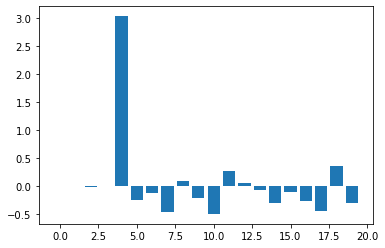

In [133]:
import matplotlib.pyplot as plt
importance = log_reg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()